In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from random import random,seed

# Import Data

In [2]:
df=pd.read_csv('data_0712.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            600 non-null    int64  
 1   platform              600 non-null    object 
 2   subject               600 non-null    object 
 3   required              600 non-null    int64  
 4   activity_time_level   600 non-null    int64  
 5   participation_level   600 non-null    int64  
 6   page_views_level      600 non-null    int64  
 7   assignment_on_time    600 non-null    float64
 8   failed                600 non-null    int64  
 9   motivation_statement  600 non-null    object 
 10  expectancy            188 non-null    float64
 11  utility_value         600 non-null    int64  
 12  intrinsic_value       600 non-null    int64  
 13  imposed_value         600 non-null    int64  
 14  cost                  600 non-null    int64  
dtypes: float64(2), int64(10

# Failure Rate Breakdown

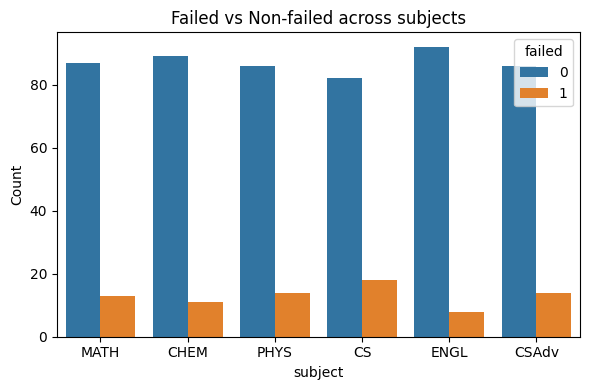

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='subject',hue='failed',data=df)
plt.title('Failed vs Non-failed across subjects')
plt.xlabel('subject')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Relationships among Motivation, Engagement, and Outcome


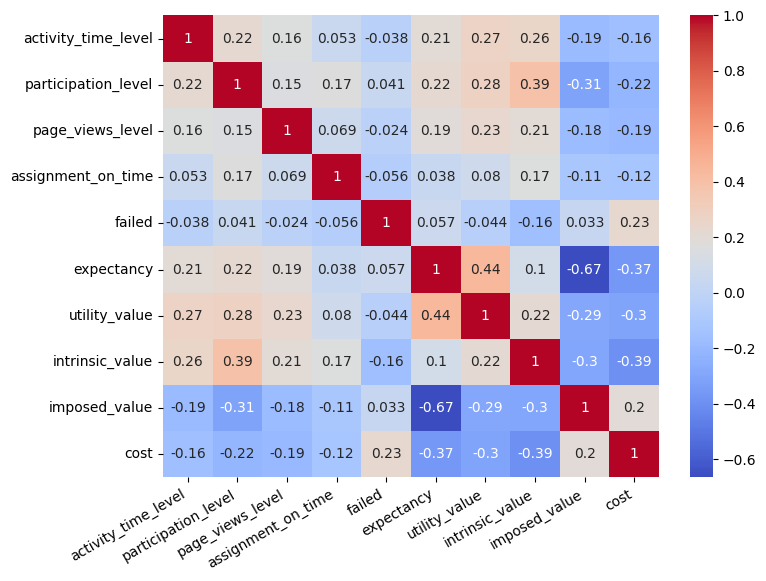

In [4]:
df_num=df.drop(['student_id','required','subject','platform','motivation_statement'],axis=1)

corr_matrix=df_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.xticks(rotation=30, ha='right')
plt.show()

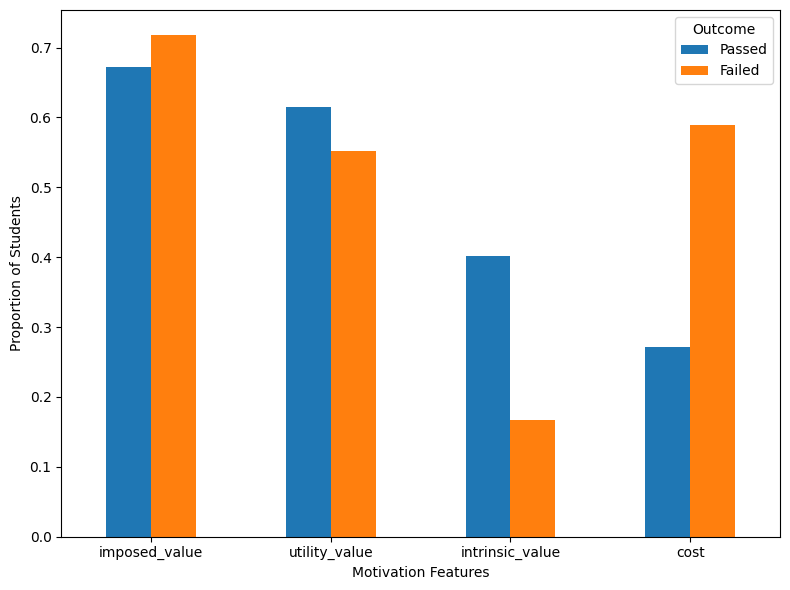

In [5]:
# Ensure boolean columns are 0/1 integers
motivation_cols = ['imposed_value', 'utility_value', 'intrinsic_value', 'cost']
df[motivation_cols] = df[motivation_cols].astype(int)

# Group by 'failed' and calculate the mean of each motivation flag
motivation_summary = df.groupby('failed')[motivation_cols].mean().T
motivation_summary.columns = ['Passed', 'Failed']  # 0 → Passed, 1 → Failed
motivation_summary = motivation_summary[['Passed', 'Failed']]  # reorder columns

# Plot
motivation_summary.plot(kind='bar', figsize=(8,6))
plt.ylabel('Proportion of Students')
plt.xlabel('Motivation Features')
plt.xticks(rotation=0)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

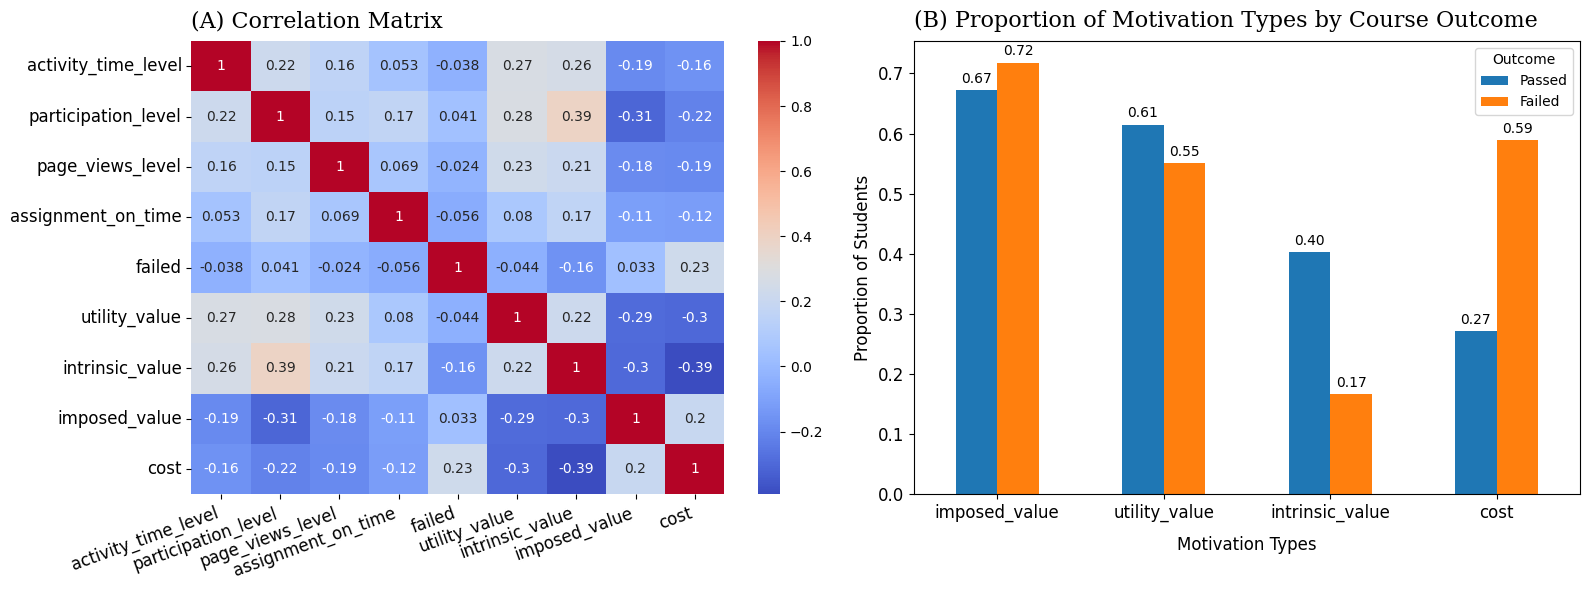

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_num = df.drop(['student_id', 'required', 'subject', 'platform', 'motivation_statement','expectancy'], axis=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: Correlation matrix
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_xticklabels(corr_matrix.columns, rotation=20, ha='right')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)
axes[0].set_title('(A) Correlation Matrix', loc='left',fontdict={'fontsize': 16, 'family': 'serif'},pad=10)

# Plot B: Motivation trait proportions
motivation_cols = ['imposed_value', 'utility_value', 'intrinsic_value', 'cost']
df[motivation_cols] = df[motivation_cols].astype(int)
motivation_summary = df.groupby('failed')[motivation_cols].mean().T
motivation_summary.columns = ['Passed', 'Failed']
motivation_summary = motivation_summary[['Passed', 'Failed']]

motivation_summary.plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Proportion of Students',fontsize=12)
axes[1].set_xlabel('Motivation Types',fontsize=12,labelpad=10)
axes[1].tick_params(axis='x', rotation=0,labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)
axes[1].legend(title='Outcome')
axes[1].set_title('(B) Proportion of Motivation Types by Course Outcome', loc='left', fontdict={'fontsize': 16, 'family': 'serif'}, pad=10)

# Get the bar containers (one for each group: Passed and Failed)
for container in axes[1].containers:
    # Loop through each bar in the container
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):  # Optional: skip missing bars
            axes[1].annotate(f'{height:.2f}',  # format to 2 decimals
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Motivation Across Subjects & Course Levels

### Course Subjects

In [7]:
df_intro=df[df.subject.isin(['MATH','CHEM','CS','ENGL','PHYS'])]
motivation_cols = ['imposed_value', 'utility_value', 'intrinsic_value', 'cost']
df_intro[motivation_cols] = df_intro[motivation_cols].astype(int)
motivation_summary = df_intro.groupby('subject')[motivation_cols].mean().reset_index()
motivation_summary


/tmp/ipython-input-7-3966448798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intro[motivation_cols] = df_intro[motivation_cols].astype(int)


,subject,imposed_value,utility_value,intrinsic_value,cost
0,CHEM,0.70,0.53,0.45,0.29
1,CS,0.65,0.59,0.40,0.30
2,ENGL,0.76,0.58,0.18,0.34
3,MATH,0.72,0.61,0.39,0.33
4,PHYS,0.70,0.54,0.45,0.31


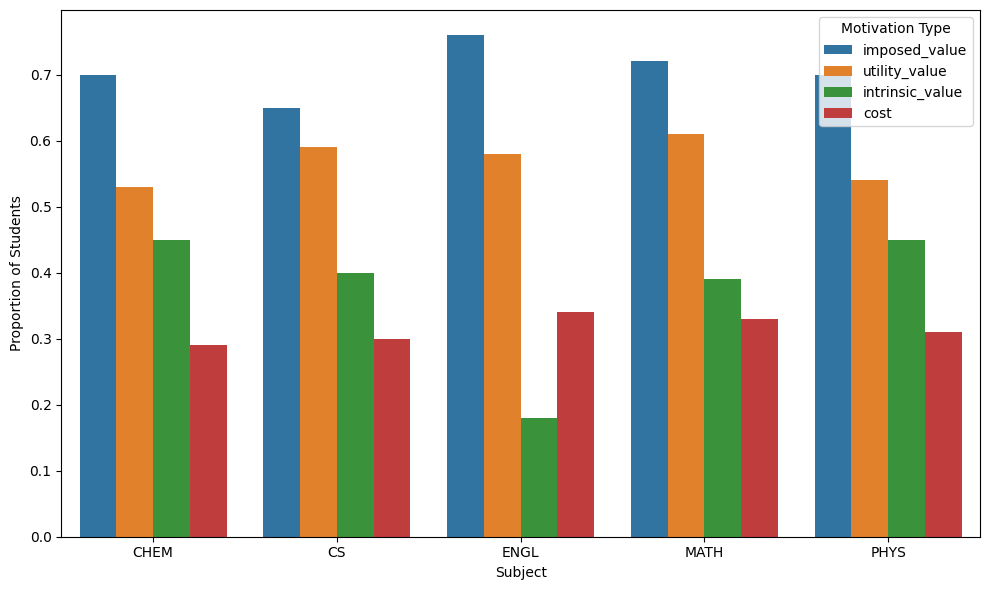

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt to long format
motivation_long = motivation_summary.melt(id_vars='subject',
                                           var_name='motivation_type',
                                           value_name='proportion')

plt.figure(figsize=(10,6))
sns.barplot(data=motivation_long, x='subject', y='proportion', hue='motivation_type')
plt.ylabel('Proportion of Students')
plt.xlabel('Subject')
plt.legend(title='Motivation Type')
plt.tight_layout()
plt.show()


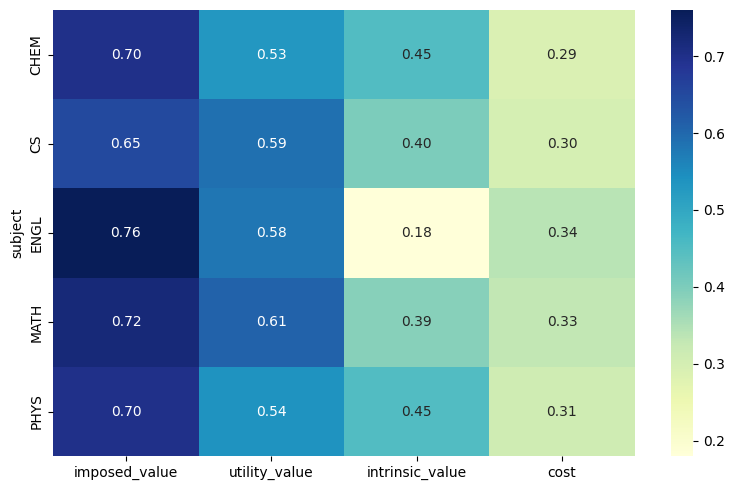

In [9]:
plt.figure(figsize=(8, 5))
sns.heatmap(motivation_summary.set_index('subject'), annot=True, cmap='YlGnBu', fmt=".2f")
plt.tight_layout()
plt.show()

### Course Levels

In [10]:
df['subject']=df['subject'].replace('CS','CSIntro')

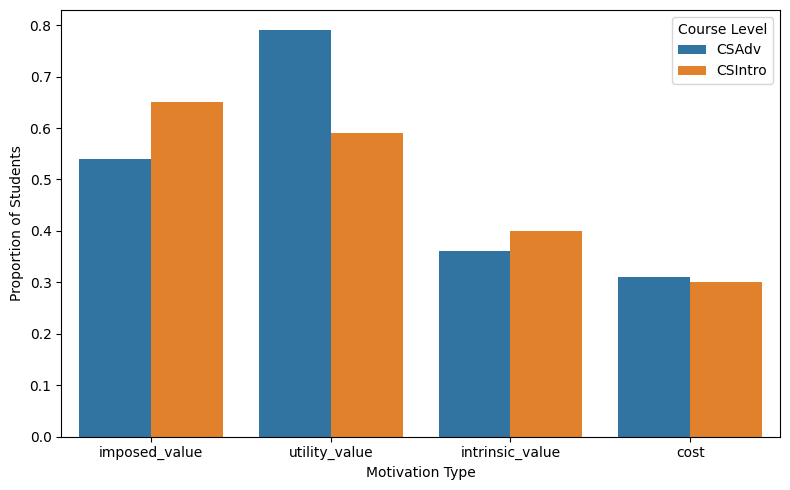

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter just the CSIntro and CSAdv rows
df_cs = df[df['subject'].isin(['CSIntro', 'CSAdv'])]

# Group by subject and compute mean for each motivation type
motivation_cols = ['imposed_value', 'utility_value', 'intrinsic_value', 'cost']
cs_summary = df_cs.groupby('subject')[motivation_cols].mean().reset_index()

# Melt for plotting
cs_melted = cs_summary.melt(id_vars='subject', var_name='Motivation Type', value_name='Proportion')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=cs_melted, x='Motivation Type', y='Proportion', hue='subject')
plt.ylabel("Proportion of Students")
plt.xlabel("Motivation Type")
plt.legend(title="Course Level")
plt.tight_layout()
plt.show()


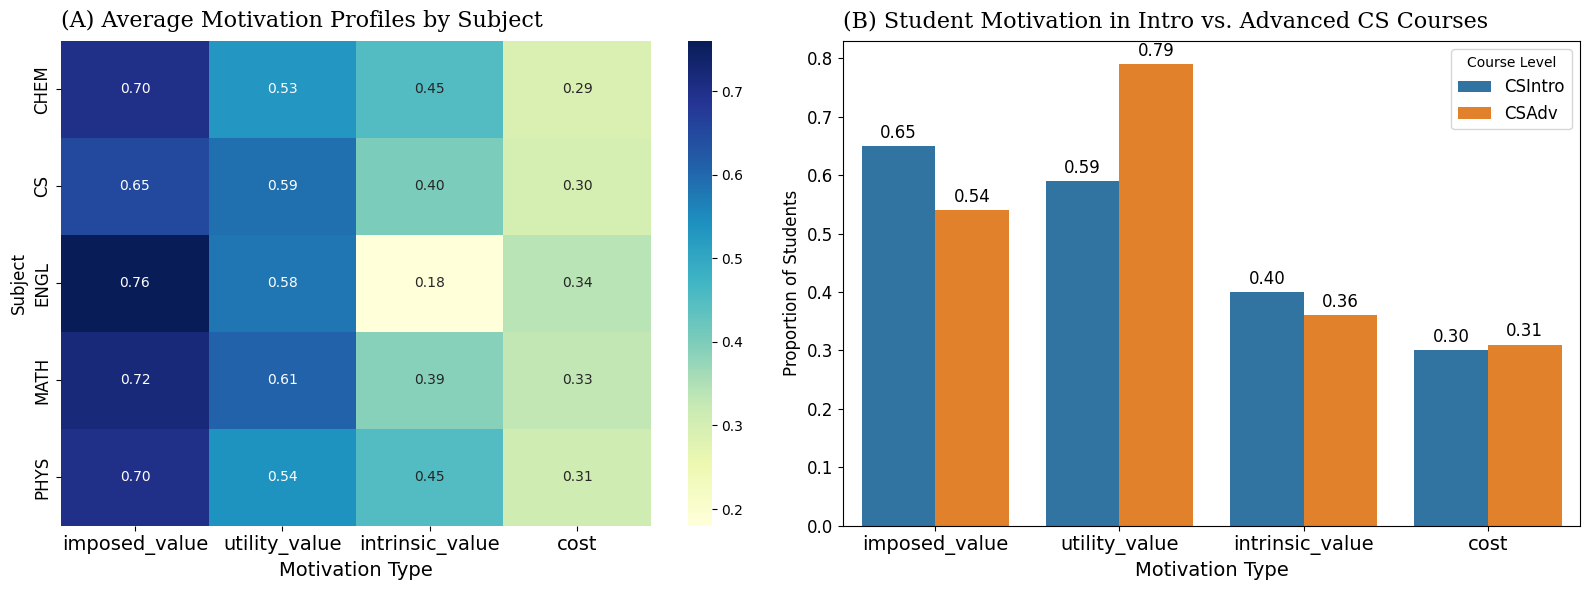

In [12]:

fig,axes=plt.subplots(1,2,figsize=(16,6))
cs_melted['subject'] = pd.Categorical(cs_melted['subject'], categories=['CSIntro', 'CSAdv'], ordered=True)

# subjects
sns.heatmap(motivation_summary.set_index('subject'), annot=True, cmap='YlGnBu', fmt=".2f",ax=axes[0])
axes[0].set_title('(A) Average Motivation Profiles by Subject',loc='left', fontdict={'fontsize': 16, 'family': 'serif'},pad=10)
axes[0].set_xlabel("Motivation Type",fontsize=14)
axes[0].set_ylabel("Subject",fontsize=12)
axes[0].tick_params(axis='x', rotation=0,labelsize=14)
axes[0].tick_params(axis='y',labelsize=12)

# levels
sns.barplot(data=cs_melted, x='Motivation Type', y='Proportion', hue='subject', ax=axes[1])
axes[1].set_ylabel("Proportion of Students",fontsize=12)
axes[1].set_xlabel("Motivation Type",fontsize=14)
axes[1].tick_params(axis='x', rotation=0,labelsize=14)
axes[1].tick_params(axis='y',labelsize=12)
axes[1].legend(title="Course Level",fontsize=12)
axes[1].set_title('(B) Student Motivation in Intro vs. Advanced CS Courses',loc='left', fontdict={'fontsize': 16, 'family': 'serif'},pad=10)


# Add annotations to each bar in the bar plot
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            axes[1].annotate(f'{height:.2f}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom',
                             fontsize=12)


plt.tight_layout()
plt.show()


# Model Training

## With motivation features

### Random Forests

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

features = [
    'activity_time_level',
    'participation_level',
    'page_views_level',
    'assignment_on_time',
    'required',
    'imposed_value',
    'utility_value',
    'intrinsic_value',
    'cost'
]

X = df[features].astype(float)
y = df['failed'].astype(int)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[100   4]
 [ 13   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       104
           1       0.43      0.19      0.26        16

    accuracy                           0.86       120
   macro avg       0.66      0.57      0.59       120
weighted avg       0.82      0.86      0.83       120

Accuracy Score: 0.8583333333333333


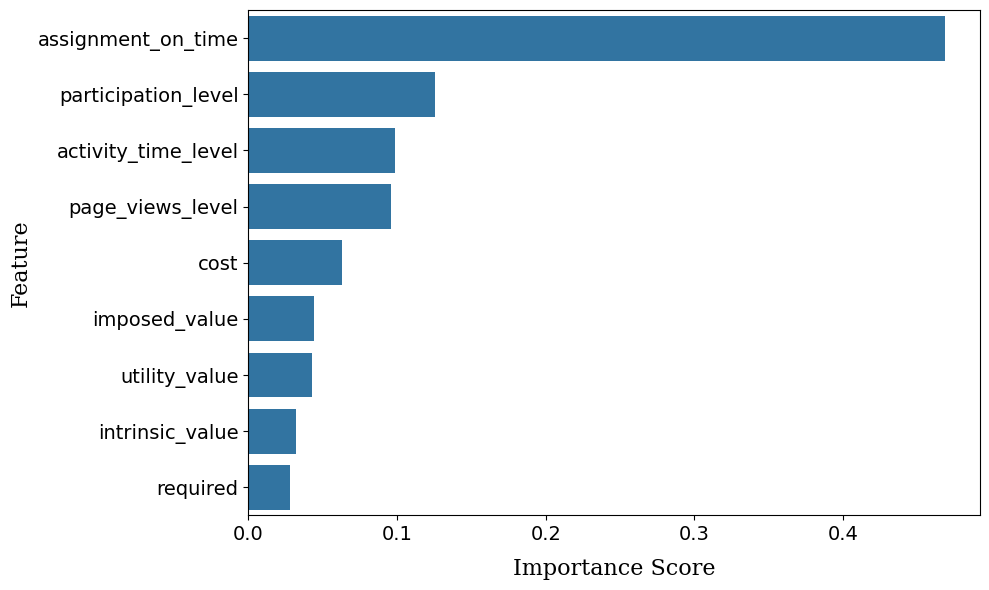

In [17]:
# import matplotlib.pyplot as plt

# importances = model.feature_importances_
# feature_names = X.columns

# # Plot
# plt.figure(figsize=(8,6))
# plt.barh(feature_names, importances)
# # plt.title("Feature Importance")
# plt.xlabel("Importance Score", fontdict={})
# plt.ylabel("Feature")
# plt.tight_layout()
# plt.show()


importances=model.feature_importances_
feature_names = X.columns

importance_df=pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
# plt.title("Feature Importance")
plt.xlabel("Importance Score",fontdict={'fontsize': 16, 'family': 'serif'},labelpad=10)
plt.ylabel("Feature",fontdict={'fontsize': 16, 'family': 'serif'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### LightGBM

In [18]:
import lightgbm as lgb

lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_test,y_test,reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt'
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_eval])

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[99  5]
 [15  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       104
           1       0.17      0.06      0.09        16

    accuracy                           0.83       120
   macro avg       0.52      0.51      0.50       120
weighted avg       0.77      0.83      0.80       120

Accuracy Score: 0.8333333333333334


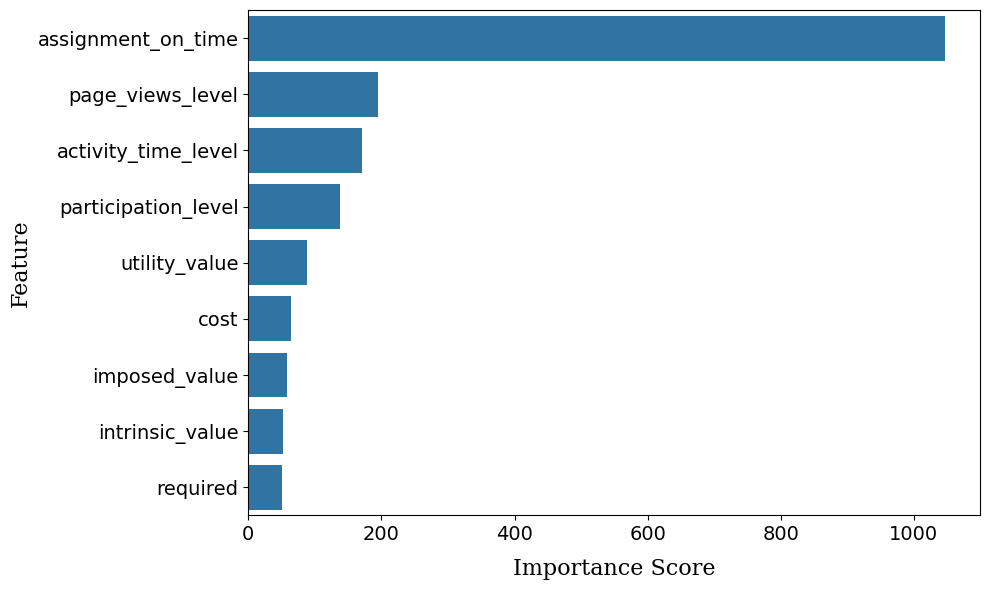

In [19]:
importances=model.feature_importance()
feature_names=model.feature_name()

importance_df=pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
# plt.title("Feature Importance")
plt.xlabel("Importance Score",fontdict={'fontsize': 16, 'family': 'serif'},labelpad=10)
plt.ylabel("Feature",fontdict={'fontsize': 16, 'family': 'serif'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

## Without motivation features

### Random Forests

Confusion Matrix:
 [[97  7]
 [15  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       104
           1       0.12      0.06      0.08        16

    accuracy                           0.82       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.77      0.82      0.79       120

Accuracy Score: 0.8166666666666667


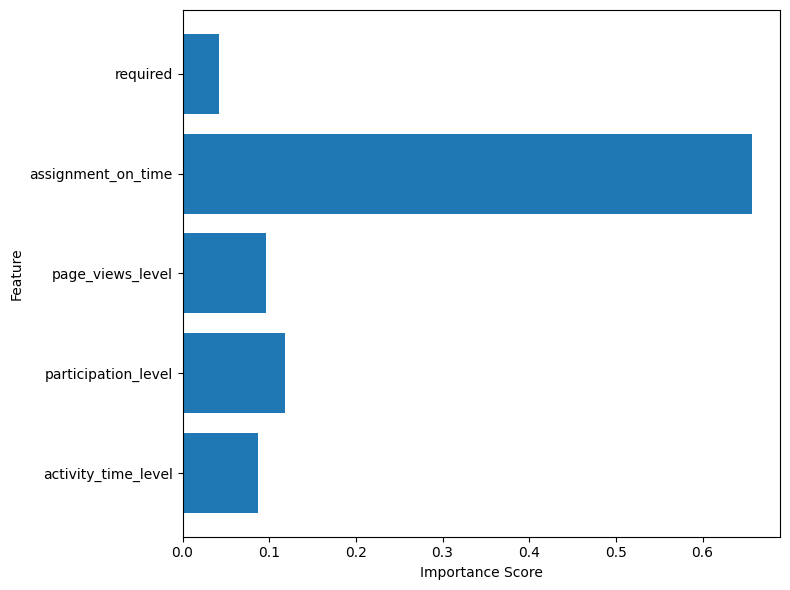

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

features = [
    'activity_time_level',
    'participation_level',
    'page_views_level',
    'assignment_on_time',
    'required',
]

X = df[features].astype(float)
y = df['failed'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,6))
plt.barh(feature_names, importances)
# plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### LightGBM

In [21]:
import lightgbm as lgb

lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_test,y_test,reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt'
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_eval])

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[101   3]
 [ 16   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       104
           1       0.00      0.00      0.00        16

    accuracy                           0.84       120
   macro avg       0.43      0.49      0.46       120
weighted avg       0.75      0.84      0.79       120

Accuracy Score: 0.8416666666666667


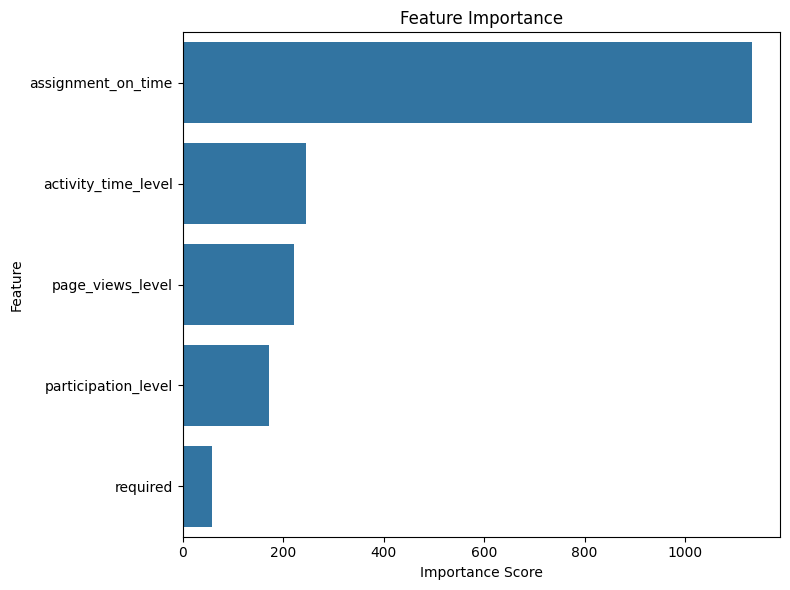

In [22]:
importances=model.feature_importance()
feature_names=model.feature_name()

importance_df=pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()